<a href="https://colab.research.google.com/github/atul1234anand/fastai/blob/master/Prg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import*
from fastai.vision import*
from fastai.metrics import error_rate

In [0]:
path = untar_data(URLs.PETS)
path


In [0]:
path.ls()

In [0]:
path_ann = path/'annotations'
path_im = path/'images'

 A data bunch contains the training data, validation data and the test data. Here the data is stored along with its labels(Eg: Images and label, text and labels etc).Normailize is used to make the mean and standard deviation of your data normal.

In [0]:
fname = get_image_files(path_im)
pat = r'/([^/]+)_\d+.jpg$'
data = ImageDataBunch.from_name_re(path_im,fname,pat,ds_tfms = get_transforms(),size=224)
data.normalize(imagenet_stats)


Using the show batch method we can show the content of the batch file (image + image name)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
37


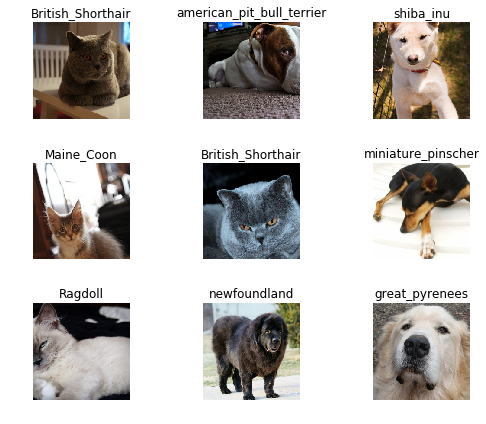

In [21]:
data.show_batch(rows=3, figsize=(7,6))
print(data.classes)
print(len(data.classes))

In [0]:
learner = cnn_learner(data,models.resnet34,metrics = error_rate)